# Assignment: Uber Supply - Demand Gap

## Aim: Analysis the given Data ot identify the root cause of the problem (i.e. cancellation and non-availability of cars)

### Given Dataset:

#### There are six attributes associated with each request made by a customer:

- **Request id**: A unique identifier of the request
- **Time of request**: The date and time at which the customer made the trip request
- **Drop-off time**: The drop-off date and time, in case the trip was completed 
- **Pick-up point**: The point from which the request was made
- **Driver id**: The unique identification number of the driver
- **Status of the request**: The final status of the trip, that can be either completed, cancelled by the driver or no cars available

### **Note :** For this assignment, only the trips to and from the airport are being considered.





## Note: 
### File Directory used: E:\Upgrad\C2 M5 Uber Demand Supply GAP

In [1]:
# Inport module operating system
import os

# Change current Working directory to the destination where files are kept...
os.chdir(r'E:\Upgrad\C2 M5 Uber Demand Supply GAP')

In [2]:
# Import all required libraries used during the analysis...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Set Plotting area background...
sns.set_style('darkgrid')

In [3]:
# Read given data into python into varable name'df'..
df=pd.read_csv('Uber Request Data.csv')

In [4]:
# Take a look on the provided dataset...
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
# Look at the different types of attributes present in dataframe...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [6]:
# Correction of dtype of date time variables like ('Request timestamp','Drop timestamp') into required one...
df['Request timestamp']=pd.to_datetime(df['Request timestamp'])
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'])

# Checing out the above action...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [7]:
# To check any duplicated row present in our dataset...
df.duplicated().any()

False

In [8]:
# Make a new attributes presenting Date and time individaully when the request has been made from attribute 'Request timestamp'
df['Request Date']=pd.DatetimeIndex(df['Request timestamp']).date

df['Request time']=pd.DatetimeIndex(df['Request timestamp']).time

# Take at the look upon modified table...
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16


### On the basis of hour of the day a request has been made a new attribute is added defining the time slot of that time...

**Time Slot is divided as follows**:

- Over Night      :  00:00 to 04:59
- Early Morning   :  05:00 to 06:59
- Morning         :  07:00 to 08:59
- Late Morning    :  09:00 to 11:59
- Afternoon       :  12:00 to 15:59
- Early Evening   :  16:00 to 17:59
- Late Evening    :  18:00 to 19:59
- Night           :  20:00 to 23:59

In [9]:
# On the basis of hour of the day a request has been made a new attribute is added defining the time slot of that time...

# Defining time intervals how the time slot is deivided...
time=[-1,5,7,9,12,16,18,20,25]

# Respective Labels of time slots...
label=['Over Night','Early Morning','Morning','Late Morning','Afternoon','Early Evening','Late Evening','Night']


df['Time_slot']=pd.cut(df['Request timestamp'].dt.hour,time,labels=label,right=False)

# Take a look upon the formed data frame...
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request time,Time_slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,Late Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,Early Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,Late Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Morning


In [10]:
# Checking of NA values present in dataset column wise...
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
Request Date            0
Request time            0
Time_slot               0
dtype: int64

#### Note : 'Driver ID' column has a NA values where Status is 'No Cars Available' 
#### and 
#### 'Drop timestamp' has for which trip is not made ('Status'== ['NO Cars Available ','Cancelled'])

In [11]:
# To find, is there any NA values present for 'Status' == 'Trip completed' data...
df.loc[df['Status']=='Trip Completed',:].isnull().sum()

Request id           0
Pickup point         0
Driver id            0
Status               0
Request timestamp    0
Drop timestamp       0
Request Date         0
Request time         0
Time_slot            0
dtype: int64

In [12]:
# To check is there any Driver ID is missing for any type of status other than 'No Cars available' 
df.loc[~(df['Status']=='No Cars Available'),:].isnull().sum()

Request id              0
Pickup point            0
Driver id               0
Status                  0
Request timestamp       0
Drop timestamp       1264
Request Date            0
Request time            0
Time_slot               0
dtype: int64

# Plots to Visualise the Total of requests happened in given timeline ...

### Note: As the given time line is for only  days frquency of any type of request not much change, so to understand how the diiferent types of request is present in given time line, total request recieve in given time is plotted. 

In [13]:
# Defining a new table represeting the count the number of times each status occurred...    
count_request=pd.DataFrame(df['Status'].value_counts())

# Take a look upon the formed table..
count_request.head()

,Status
Trip Completed,2831
No Cars Available,2650
Cancelled,1264


Text(0.5, 1.0, 'Frequency of Status of trips')

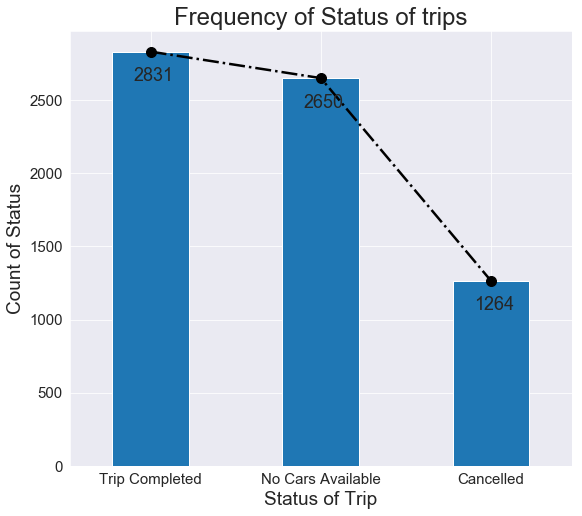

In [14]:
# Plotting the graph..

b=count_request['Status']         # Defining y-axis of the plot
a=count_request.index             # Defining x-axis of the plot

# Bar plot is designed...
count_request.plot.bar(width=0.45,figsize=(9,8),rot=0,legend=False)

# Plotting a line to visualize the difference between different count of request easily...
plt.plot(a,b,'ko-.',linewidth=2.5,markersize=10)

# Representing values of total no. of request on each bar...
for i in range(len(a)):
    plt.text(x=i-0.1,y=b[i]-200,s=b[i],size=18)

# Required plot area representation modification for ease of understanding...
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Count of Status',fontsize=19)
plt.xlabel('Status of Trip',fontsize=19)
plt.title('Frequency of Status of trips',fontsize=24)

## Insights from plot

#### Plot Clearly shows that the ‘No Cars Available’ type of status is almost double than problem ‘Cancellation’ facing by the customers.

### Most pressing problem to concerned about is ‘No Cars Available’










## Plot a Graph for understanding the most problematic type of request (city to airport / airport to city ) and also the time slots in each type of request...

In [15]:
# Defining a data frame excluded request 'Trip Completed'
df2=df.loc[~(df['Status']=='Trip Completed'),:]

# Look upon the new table left...
df2.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request time,Time_slot
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,06:08:41,Early Morning
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17:07:58,Early Evening
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20:51:37,Night
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10:12:40,Late Morning
2835,2347,Airport,2.0,Cancelled,2016-12-07 19:14:00,NaT,2016-12-07,19:14:00,Late Evening


In [16]:
# Modify of the table to represent the total number of category in different type of each request...
df2=pd.DataFrame(df2.groupby(['Pickup point','Time_slot','Status']).size().unstack())

# Take a look upon the table
df2

Status                      Cancelled  No Cars Available
Pickup point Time_slot                                  
Airport      Over Night             2                148
             Early Morning          8                  7
             Morning                7                  7
             Late Morning          22                 30
             Afternoon             36                 55
             Early Evening         33                224
             Late Evening          30                577
             Night                 60                665
City         Over Night            63                151
             Early Morning        313                163
             Morning              340                146
             Late Morning         230                159
             Afternoon             33                127
             Early Evening         24                 54
             Late Evening          18                 28
             Night                 45                109

In [17]:
# Adding a new attribute named 'Total' defining Total request that is incomplete...
df2['Total']=df2['Cancelled']+df2['No Cars Available']

# Look upon the table...
df2.head()

Status                      Cancelled  No Cars Available  Total
Pickup point Time_slot                                         
Airport      Over Night             2                148    150
             Early Morning          8                  7     15
             Morning                7                  7     14
             Late Morning          22                 30     52
             Afternoon             36                 55     91

## Note: Plot is divided into two figures depending upon the type of request is made to observe the variation of the status w.r.t. time slots...

Text(3.4, 290, 'Total Non-Completion Trips = 2003')

<Figure size 432x288 with 0 Axes>

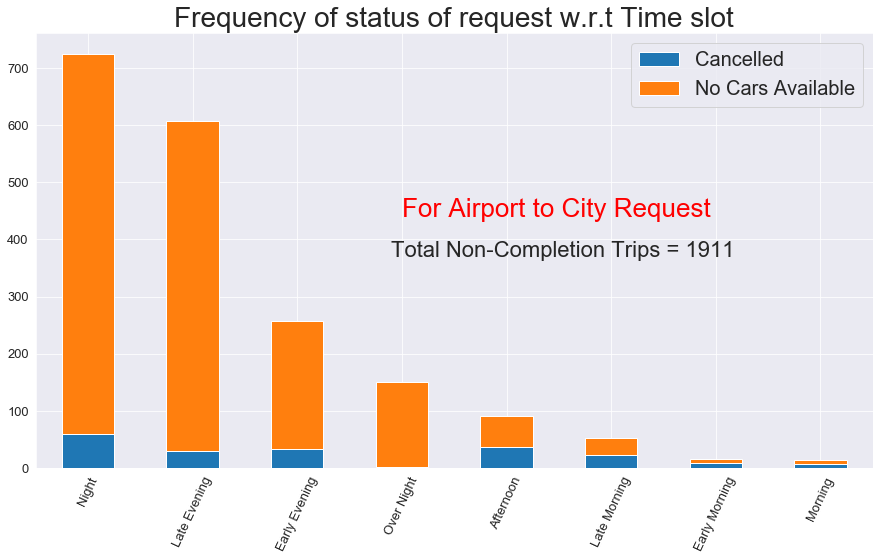

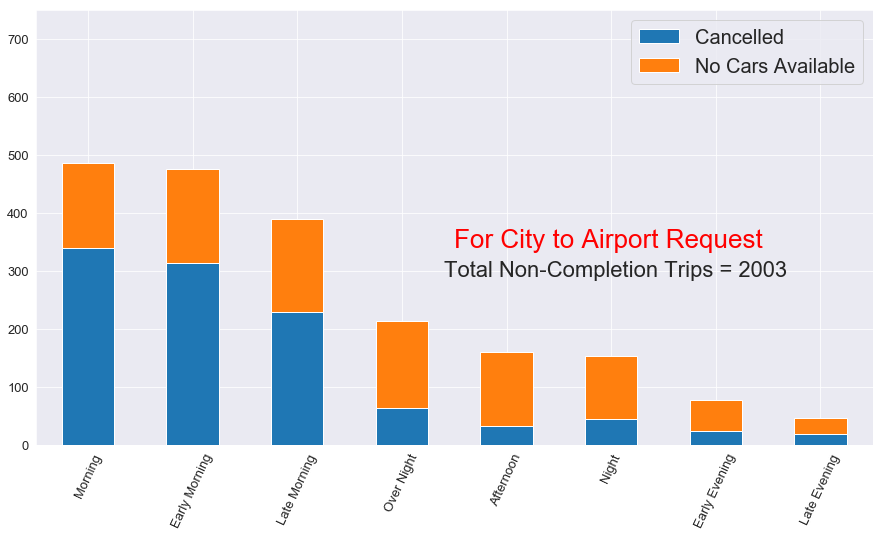

In [57]:
# Plotting the required graph...


# Defining the 1st figure considering request from 'Airport to City'
plt.figure(1)
df2.iloc[:8,:].sort_values(by='Total',ascending=False).drop('Total',axis=1).plot(kind='bar',stacked=True,figsize=(15,8),rot=65,use_index=False)

# Adding a legend...
plt.legend(fontsize=20)

# Setting the x ticks labels properly... 
label=list(df2.iloc[:8,:].sort_values(by='Total',ascending=False).reset_index()['Time_slot'])
a=[i for i in range(8)]
plt.xticks(a,label,fontsize=13)

# Setting y-ticks text...
plt.yticks(fontsize=13)

# Additional text for ease of understading and differentiation of the graph...
plt.title('Frequency of status of request w.r.t Time slot',fontsize=28)
plt.text(3,440,'For Airport to City Request',fontsize=26,color='red')
plt.text(2.9,370,'Total Non-Completion Trips = {}'.format(df2.iloc[:8,-1].sum()),fontsize=22)




# Defining the 2nd figure considering request from 'City to Airport'
plt.figure(2)

df2.iloc[8:,:].sort_values(by='Total',ascending=False).drop('Total',axis=1).plot(kind='bar',stacked=True,figsize=(15,8),rot=65,use_index=False)

label=list(df2.iloc[8:,:].sort_values(by='Total',ascending=False).reset_index()['Time_slot'])
a=[i for i in range(8)]
plt.xticks(a,label,fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0,750)
plt.legend(fontsize=20)

plt.text(3.5,340,'For City to Airport Request',fontsize=26,color='red')
plt.text(3.4,290,'Total Non-Completion Trips = {}'.format(df2.iloc[8:,-1].sum()),fontsize=22)

## Insights from plot

#### Total Incompletion trips for:
-  Airport to city : 1911
-  City to Airport : 2003

#### Total incompletion trips are almost same for both the type of requests

#### For request Airport to City:
‘Night’, ‘Late Evenings’ and ’Early Evening’ (time from 4 pm to 12 am) are peak time slots where the problem is maximum
And in these identified time slots ‘No Cars Available’ is emerging to be the main pressing problem where focused is needed


#### For request City to Airport :
Here ‘Morning’, ‘Early Morning’ and ‘Late Morning’ (time from 5 am to 12 pm) are peak time slots where the problem is maximum
Here Both ‘No Cars Available’ & ‘Cancellation’ have being equally reasonable for the problem with ‘Cancellation’ contribute a little higher percentage


# To find out the gap between supply and demand w.r.t Time Slot and type of requests for which the gap is severe...

In [20]:
# Defining a new data frame describing the GAP between Demand and Supply...

# Form Data Frame representing Supply of cars needed at different time slots of the day...
supply=df.loc[~(df['Status']=='No Cars Available'),:].pivot_table(index='Time_slot',values='Status',aggfunc='count')

# Form Data Frame representing Demand of cars needed at different time slots of the day...
Demand=pd.DataFrame(df.groupby('Time_slot').size())

# Merging to data frame into one name 'gap'...
gap=pd.merge(Demand,supply,how='outer',on='Time_slot')

# Rename of the columns for better understanding...
gap.columns=['Demand','Supply']

# Form new attribute represnting the GAP between Demand and Supply in different time slots...
gap['GAP']=gap.Demand-gap.Supply

# Sort the whole table w.r.t. the 'GAP'... 
gap.sort_values(by='GAP',ascending=False,inplace=True)

# Take a look upon new formed table...
gap.head()

,Demand,Supply,GAP
Time_slot,,,
Night,1439,665,774
Late Evening,983,378,605
Over Night,578,279,299
Early Evening,577,299,278
Late Morning,845,656,189


In [55]:
# To find the average Supply w.r.t. Demand in different time slots...
Average=round(np.mean([(gap.Supply[i]/gap.Demand[i])*100 for i in gap.index]),2)

print(Average)

61.98


Text(0.5, 0, 'Time Slots')

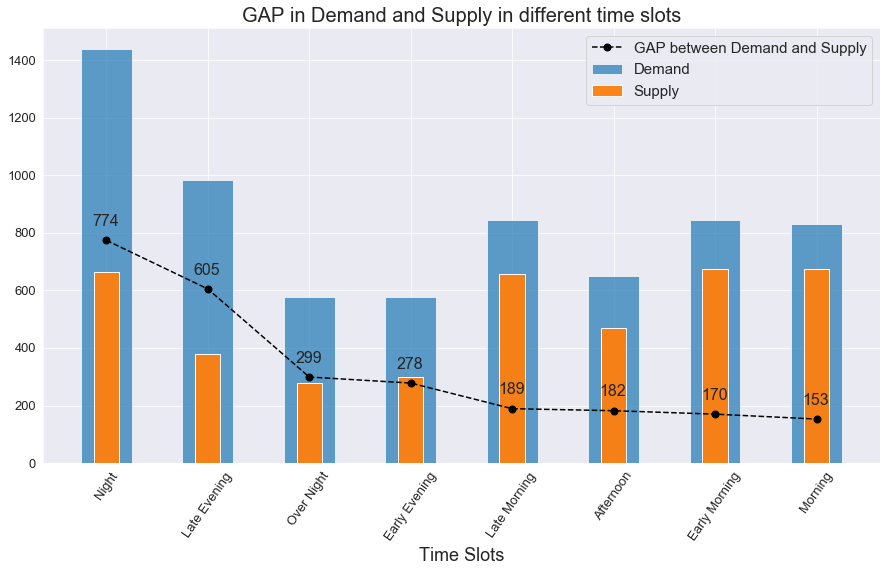

In [26]:
# Required plot

# Set figure size...
plt.figure(figsize=(15,8))   

# Set commom x-axis variable...
a=list(gap.index)

# Bar plot representing Deamand at different time slots...
plt.bar(a,gap.Demand,width=0.5,alpha=0.7,label='Demand')

# Bar plot representing Supply at different time slots...
plt.bar(a,gap.Supply,width=0.25,alpha=0.95,label='Supply')

# Line Represeting GAP in various time slots...
plt.plot(a,gap.GAP,'ko--',markersize=7,label='GAP between Demand and Supply')

# Include legend for better understanding...
plt.legend(fontsize=15)

# Add the values of GAP in above of each point on line representing GAP...
for i,n in enumerate(gap.GAP) :
    plt.text(i-0.14,y=n+50,s=n,size=16)

# Additional setting of plot for better understanding...
plt.xticks(size=13,rotation=55)
plt.yticks(size=13)
plt.title('GAP in Demand and Supply in different time slots',fontsize=20)
plt.xlabel('Time Slots',fontsize=18)

## Insights from plot

#### Plot shows the Demand and Supply in different time slots of a day with highlighted the GAP between them GAP between Demand and Supply is maximum during ‘Night’ & ‘Late Evening’ ( From  6 pm to 12 am)


#### On the average :
Supply = 62% of the Demand (in all time slots) 


### Note: For the time slots after afternoon don’t only have GAP maximum, also the Demand at that time is also very high.


### Plot representing the GAP in time slots and also represeting the most problematic type of request where the problem is more severe

In [22]:
# Form a data frame represeting Demand of cars for both type of request in different time slots...
Demand=pd.DataFrame(df.groupby(['Time_slot','Pickup point']).size()).unstack()

# Rename of column to remove ambiguity...
Demand.columns=['Airport Demand','City Demand']


# Form a data frame represeting Supply of cars for both type of request in different time slots...
Supply=pd.DataFrame(df.loc[(df['Status']!='No Cars Available')].groupby(['Time_slot','Pickup point']).size()).unstack()

# Rename of column to remove ambiguity...
Supply.columns=['Airport Supply','City Supply']


# Merge the form to data frame in a way representing GAP in demand and supply in different type of request in different time slots...
cate_gap=pd.DataFrame({'gap in Airport to city':(Demand['Airport Demand']-Supply['Airport Supply']),'gap in City to Airport':(Demand['City Demand']-Supply['City Supply'])})

# Adding the attribute total represeting total GAP at that time slot...
cate_gap['GAP']=cate_gap['gap in Airport to city']+cate_gap['gap in City to Airport']

# Rearrange the table w.r.t. total GAP in that time slot for particular type of request...
cate_gap.sort_values(by='GAP',inplace=True,ascending=False)

# Take a look upon formed table...
cate_gap

Text(0.5, 1.0, 'Gap due to each type of request in different time Slots')

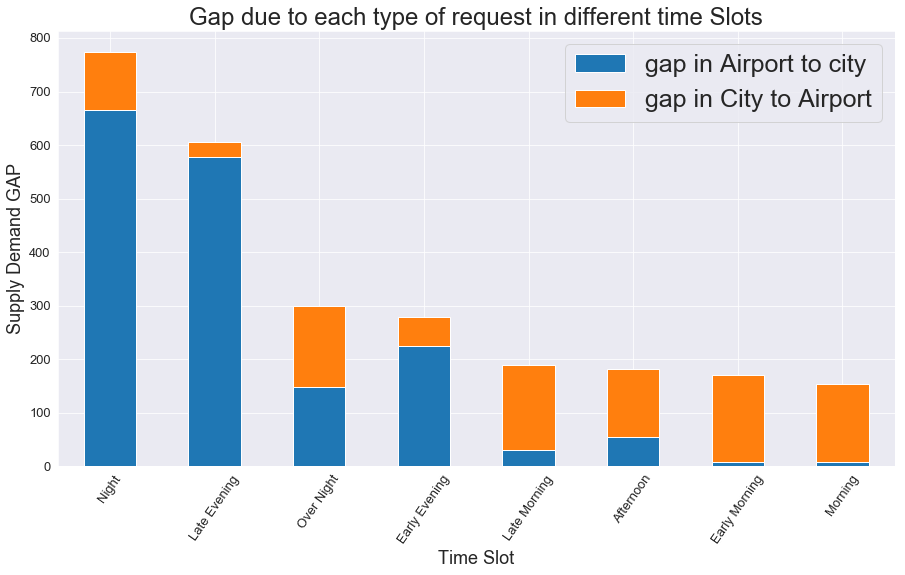

In [23]:
# Plot

# Stacked plot to see the contribution of the each type of request in total GAP in different time slot...
cate_gap.drop('GAP',axis=1).plot(stacked=True,kind='bar',figsize=(15,8),rot=55)

# Adding the legend for better understanding...
plt.legend(fontsize=25)

# Additional of plots features....
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Time Slot',fontsize=18)
plt.ylabel('Supply Demand GAP',fontsize=18)
plt.title('Gap due to each type of request in different time Slots',fontsize=24)

## Insights from plot


#### The time slots where the GAP between the Demand and Supply is maximum (For e.g. ‘Night’, ’Late Evening’) has a major contribution of the request from ‘Airport to City’ 

### Conclusion : Airport to City request type need more focused for after ‘Afternoon’ time until ‘Morning’


### Note: Whereas time slots having less GAP (For e.g., Early Morning, Morning) is majorly due to the request type of ‘City to Airport’



## Additional finding :
### Driver ID's who are more likely in cancelling the trip of the customer 

In [24]:
Driver=df.loc[df.Status=='Cancelled'].groupby('Driver id').size().reset_index(name='Size').sort_values(by='Size',ascending=False)
Driver.loc[Driver['Size']>8]['Driver id'].astype(np.int64).tolist()

[84, 54, 206, 142, 267, 166, 114, 138, 210, 27]

## Hypothesis :

#### Major GAP between Demand and Supply is in request ‘Airport to city’ after Afternoon time slot,


#### There can be possible reasons:
-  Flights incoming are more than outgoing after afternoon time (As we see at these time slots Demand is also very high)
-  People coming to airport from city are usually use there own cars which decrease the supply of cars at the airport
-  Drivers of cars tend to stay in city rather than to make 1 long trip to airport, wait there for few hours and then get back (As we see Driver are tend to cancel the request from city to airport very often)
-  Low No. of cars available (As we have see ‘No Cars available’ is major reason for any type of request which results in shortage of supply


## Recommendations :

-  Launch more cars to meet the ‘No Cars Available’ type of status
-  Talk to drivers who cancelled trips more often and try to understand the reason behind it
-  Increase the increment of drivers for trips through and out to the airport
-  By taking IN and OUT flights data of the airport, Supply cars directly to airport when the Demand is on its peak (like in night time)
